<a href="https://colab.research.google.com/github/sttesta3/7506R-1C2024-GRUPO08/blob/santiago/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# General libs
import pandas as pd
import numpy as np

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#Modelos
from sklearn.cluster import KMeans

# KFold cross validation
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Otras librerías
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [ ]:
# Ruta donde van a estar todos los datasets
ruta = "https://raw.githubusercontent.com/sttesta3/7506R-1C2024-GRUPO08/fede/datasets/"
ds = pd.read_csv(ruta + "ds_filtrado.csv")

ds.drop(columns="start_date",inplace=True)
ds.drop(columns="place_l3",inplace=True)
ds.drop(columns="property_type",inplace=True)

ds.info()

ds_train, ds_test = train_test_split(ds, test_size=0.2 , random_state=2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52366 entries, 0 to 52365
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitud                   52366 non-null  float64
 1   longitud                  52366 non-null  float64
 2   property_rooms            52366 non-null  int64  
 3   property_bedrooms         52366 non-null  int64  
 4   property_surface_total    52366 non-null  float64
 5   property_surface_covered  52366 non-null  float64
 6   property_price            52366 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 2.8 MB


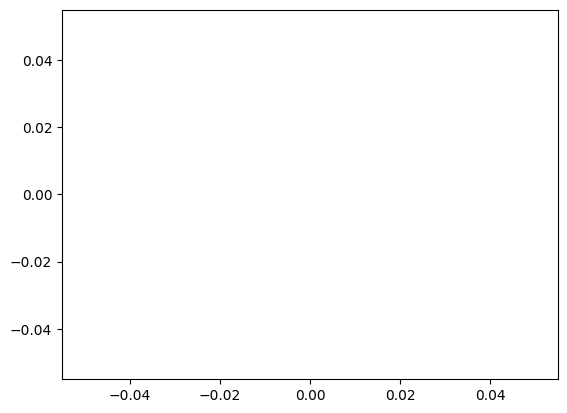

In [ ]:
# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.
errores = []
variacion = []

for clusters in range(1,15):
    km = KMeans(n_clusters=clusters)
    km.fit(ds_train)
    errores.append(km.inertia_)

plt.plot(range(1,15), errores)
plt.show()

In [ ]:
# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.
errores = []
variacion = []

for clusters in range(1,15):
    km = KMeans(n_clusters=clusters)
    km.fit(ds_train)
    errores.append(km.inertia_)
    errores.append( np.sqrt(-cross_val_score(km, ds_train,scoring="neg_mean_squared_error")).mean())

plt.plot(range(1,15), errores)
plt.show()

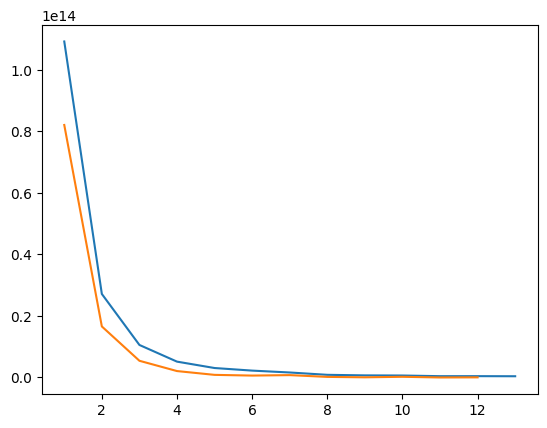

In [ ]:
variacion = []
aceleracion = []

for i in range(1,len(errores)):
  variacion.append(errores[i-1] - errores[i])

for i in range(1,len(variacion)):
  aceleracion.append(variacion[i-1] - variacion[i])

plt.plot(range(1,len(errores)),variacion)
plt.plot(range(1,len(variacion)),aceleracion)
plt.show()